# Device Price Prediction Systems

### Importing the libraris

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import pickle as pc

### Importing the dataset


In [279]:
train_df = pd.read_excel(r'D:\Maids\DevicesPriceClassificationSystem\train.xlsx')
test_df = pd.read_excel(r'D:\Maids\DevicesPriceClassificationSystem\test.xlsx')


In [280]:
train_df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [281]:
test_df.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [282]:
test_df = test_df.drop(test_df.columns[0], axis=1)

### Data Exploration

In [283]:
def print_dataset_info(df, dataset_name):
    """Prints information about the dataset."""
    print(f"{dataset_name} Info:")
    print(f'The Data Shape is {df.shape}')
    print(df.info())
    print()

def print_summary_statistics(df):
    """Prints summary statistics for numerical features."""
    print("Summary Statistics for Numerical Features:")
    print(df.describe())
    print()

def print_missing_values(df, dataset_name):
    """Prints missing values in the dataset."""
    print(f"Missing Values in {dataset_name}:")
    print(df.isnull().sum())
    print()

def explore_data(train_df, test_df):
    """Performs data exploration tasks."""
    print_dataset_info(train_df, "Training Dataset")
    print_dataset_info(test_df, "Test Dataset")
    
    print_summary_statistics(train_df)
    
    print_missing_values(train_df, "Training Dataset")
    print_missing_values(test_df, "Test Dataset")


In [284]:
explore_data(train_df, test_df)

Training Dataset Info:
The Data Shape is (2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  

In [285]:
# Print the list of column names in the dataset
attributes_name = list(train_df.columns)
print("Dataset Column Names:", attributes_name)

Dataset Column Names: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


### Visualizations for numerical features



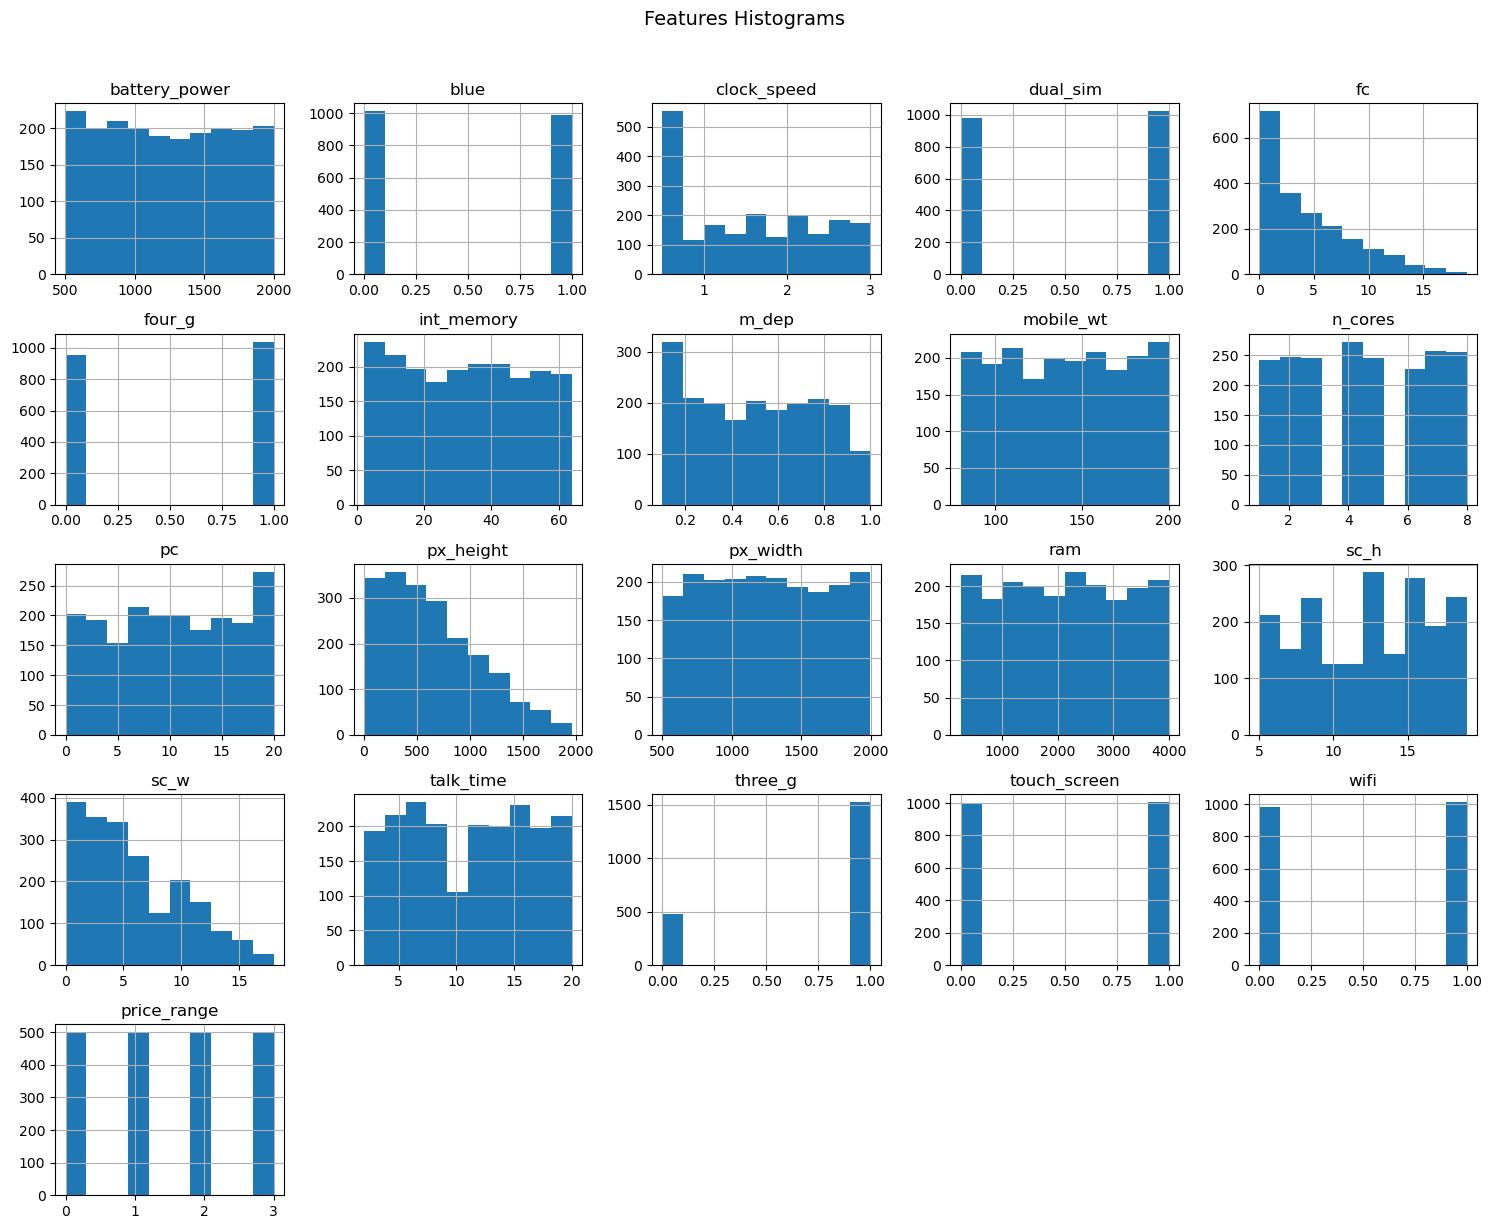

Correlation with 'price_range':
price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64


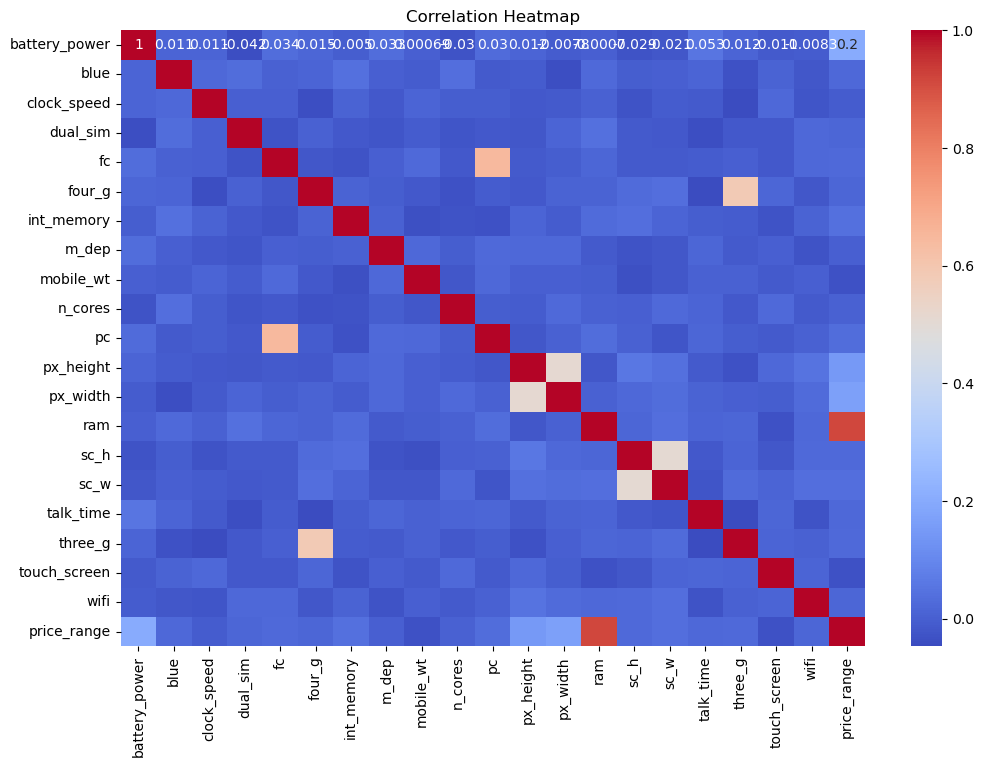

In [286]:
train_df.hist(figsize=(15, 12))
plt.suptitle('Features Histograms', x=0.5, y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
corr_matrix = train_df.corr()
print("Correlation with 'price_range':")
print(corr_matrix['price_range'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1) The features display different ranges of values. It's crucial to **normalize** or **standardize** these features during preprocessing to enable fair comparisons on a uniform scale.
   
2) Specific features such as 'dual_sim', 'blue', 'four_g', etc are encoded as binary values, with **1** denoting the **presence** of the feature and **0** denoting its **absence**.
4) Based on the analysis, **'ram'** exhibits the strongest **positive correlation** with **'price_range'** (**0.917448**), whereas **'mobile_wt'** shows a slight **negative correlation** (**-0.032168**). These findings provide valuable insights into the key features influencing price range predictions.

### Taking care of missing data

It shows that there are some **missing values** ​​and therefore we need to deal with them to ensure the efficiency of the model.

The dataset has a maximum of 5 missing values per observation, with only 9 rows (**0.45%** of the data) affected. Deleting these rows is the recommended approach for handling missing values.

In [287]:
# Drop rows with missing values
train_df.dropna(axis=0, inplace=True)
print_missing_values(train_df, "Training Dataset")

Missing Values in Training Dataset:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64



### Taking care of data types

In [288]:
# Convert selected columns to int64 type
columns_to_convert_int = ['fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width','ram','sc_h','sc_w']
columns_to_convert_int = {col: 'int64' for col in columns_to_convert_int}
train_df = train_df.astype(columns_to_convert_int)


In [289]:
print_dataset_info(train_df,"Training Dataset")

Training Dataset Info:
The Data Shape is (1991, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   int64  
 5   four_g         1991 non-null   int64  
 6   int_memory     1991 non-null   int64  
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   int64  
 9   n_cores        1991 non-null   int64  
 10  pc             1991 non-null   int64  
 11  px_height      1991 non-null   int64  
 12  px_width       1991 non-null   int64  
 13  ram            1991 non-null   int64  
 14  sc_h           1991 non-null   int64  
 15  sc_w           1991 non-null   int64  
 16  talk_time      1991 non-null   int64  
 17  three

### Splitting the dataset into the Training set and Test set

In [290]:
# Separate features (X) and target variable (y)
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [291]:
print(X)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [293]:
print(X_train)

[[1.494e+03 0.000e+00 1.600e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [9.200e+02 0.000e+00 2.100e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.524e+03 0.000e+00 2.600e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [1.751e+03 0.000e+00 2.500e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.288e+03 0.000e+00 2.800e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.860e+02 1.000e+00 1.500e+00 ... 1.000e+00 0.000e+00 0.000e+00]]


In [294]:
print(y_train)

[3 0 0 ... 1 3 1]


### Feature Scaling (Standardization)

In [295]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [296]:
X_train_scaled

array([[ 0.59658759, -0.97151117,  0.06910778, ...,  0.56090643,
        -1.00125707, -0.99874451],
       [-0.71434686, -0.97151117,  0.68100763, ..., -1.78282856,
         0.99874451,  1.00125707],
       [ 0.66510333, -0.97151117,  1.29290748, ..., -1.78282856,
         0.99874451,  1.00125707],
       ...,
       [ 1.18353908, -0.97151117,  1.17052751, ..., -1.78282856,
         0.99874451,  1.00125707],
       [ 0.12611286, -0.97151117,  1.53766742, ..., -1.78282856,
        -1.00125707, -0.99874451],
       [-0.56361224,  1.02932425, -0.05327219, ...,  0.56090643,
        -1.00125707, -0.99874451]])

In [297]:
X_test_scaled

array([[ 1.4644536 ,  1.02932425, -1.15469191, ..., -1.78282856,
         0.99874451, -0.99874451],
       [-0.56132838,  1.02932425,  0.92576757, ...,  0.56090643,
         0.99874451, -0.99874451],
       [ 0.25629276,  1.02932425,  1.78242736, ...,  0.56090643,
        -1.00125707, -0.99874451],
       ...,
       [ 1.05792689, -0.97151117,  0.19148775, ..., -1.78282856,
         0.99874451,  1.00125707],
       [ 0.98255958,  1.02932425, -1.27707188, ...,  0.56090643,
        -1.00125707, -0.99874451],
       [-0.62070869,  1.02932425, -0.05327219, ...,  0.56090643,
         0.99874451,  1.00125707]])

### Training the Logistic Regression model on the Training set

<font color='#8B4513'><b>Logistic Regression</b></font> is computationally efficient and scalable. It is particularly advantageous when dealing with large datasets, as it requires less computational resources and training time compared to more complex models. This is important for ensuring that our model can be trained and evaluated quickly and efficiently.

In [298]:
# Initialize and train Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

### Predicting a new result

In [299]:
y_pred = classifier.predict(X_test_scaled)
print("\nPredictions and Actual Values:")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))



Predictions and Actual Values:
[[1 1]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [0 0]
 [3 2]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [2 2]
 [3 2]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 0]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [3 3]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [

### Making the Confusion Matrix and Classification Report

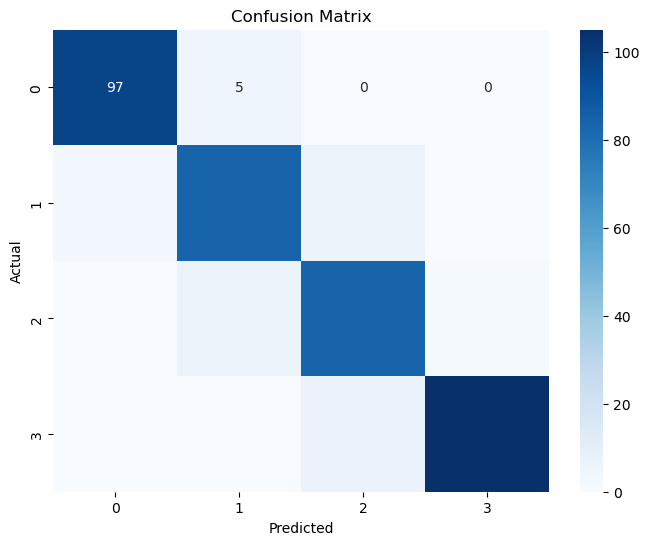

[[100   2   0   0]
 [  2  91   0   0]
 [  0   2  85   5]
 [  0   0   1 111]]


0.9699248120300752

In [300]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



In [301]:
# Calculate training accuracy
train_accuracy = classifier.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
# Calculate test accuracy
test_accuracy = classifier.score(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 97.49%
Test Accuracy: 96.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.96      0.98      0.97        93
           2       0.99      0.92      0.96        92
           3       0.96      0.99      0.97       112

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



In [302]:
# Perform 5-fold cross-validation
scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5)

# Print each cross-validation score
print("Cross-validation scores:", scores)

# Print the average cross-validation score
average_score = scores.mean()
print(f"Average cross-validation score: {average_score:.2f}")


Cross-validation scores: [0.95611285 0.95611285 0.9591195  0.94654088 0.98427673]
Average cross-validation score: 0.96


## Trying Different Algorithms

In [303]:
# Initialize other models for comparison
rf_classifier = RandomForestClassifier(random_state=0)
svc_classifier = SVC(random_state=0)
gb_classifier = GradientBoostingClassifier(random_state=0)

# List of models to evaluate
models = [rf_classifier, svc_classifier, gb_classifier]
model_names = ['Random Forest', 'SVM', 'Gradient Boosting']

# Train and evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)



Random Forest Accuracy: 91.48%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       102
           1       0.91      0.85      0.88        93
           2       0.84      0.88      0.86        92
           3       0.95      0.94      0.95       112

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.92      0.91      0.91       399

Random Forest Confusion Matrix:
[[100   2   0   0]
 [  6  79   8   0]
 [  0   6  81   5]
 [  0   0   7 105]]

SVM Accuracy: 96.49%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.93      0.98      0.95        93
           2       0.95      0.96      0.95        92
           3       1.00      0.96      0.98       112

    accuracy                           0.96       399
   macro avg

After comparing all the previous models, it has been determined that **logistic regression** still achieves the highest accuracy.



In [304]:
# Save the model and scaler to files
model_file = 'device_price_classifier.pkl'
scaler_file = 'scaler.pkl'


with open(model_file, 'wb') as model_f, open(scaler_file, 'wb') as scaler_f:
    pc.dump(classifier, model_f)
    pc.dump(scaler, scaler_f)

print(f"Model saved to {model_file}")

Model saved to device_price_classifier.pkl


In [305]:
with open(model_file, 'rb') as model_f, open(scaler_file, 'rb') as scaler_f:
    loaded_model = pc.load(model_f)
    loaded_scaler = pc.load(scaler_f)

In [306]:
    # Assuming test_df is scaled and processed similarly to train_df
    test_df_scaled = loaded_scaler.transform(test_df)

    # Predict using the loaded model
    predictions = loaded_model.predict(test_df_scaled)
    print("\nPredictions for Test Data:")
    print(predictions)



Predictions for Test Data:
[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 0 3 1 1 3 3 3 0 1 1 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 1 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 2 2 0 2 1 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 2 3 2 3 2 2 1 0 0 1 3 0 2 2 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 1 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 1 0 2 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 3 0 0 3 1 2 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 1 0 0

D:\Application\AppsLocation\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
